<a href="https://colab.research.google.com/github/pooja0207k/website/blob/main/Chapter_2_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![title](img/unc-charlotte-logo.gif)

# What is preprocessing

In order to achieve useful datamining the data preprocessing is an important step. Data preprocessing consists of:
* Data cleaning
* Data transformation

The overriding objective is to **minimize GIGO** (*Garbage in Garbage out*)


## Data Cleaning

* Loading data to Pandas
* Understanding structure of data
* Identifying Continuous and Categorical data
* Handling Missing data
* Methods to identify outliers
* Measuring centrality of data
* Measuring spread of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import scipy.stats as stats
%matplotlib inline
sns.set()

### Loading data to pandas

Pandas can load data from various sources such sql db, txt file, csv file, excel etc. In following example cars.txt is loaded into pandas.

<font color = 'red'> Can you identify different sources from which data can be loaded into Pandas? </font>

In [2]:
cars = pd.read_csv("data/cars.txt")

### Understanding structure of data

1. Looking at top rows of data
2. Looking at columns in data and their types
3. Describing / Summarizing data

In [3]:
# 1. Top rows can be seen by calling dataframe.head(), we can specify rows to display as parameter
# Ex. cars.head(2) will display top 2 rows in cars dataframe.
cars.head() # Can you print top 10 rows of cars?

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
#  2. Structure of dataframe can looked by calling dataframe.info() function.
#  N entries - N rows in dataframe
#  N columns - N columns in dataframe
#  Together they show dimension of data frame.
#  Data columns, total count, default, and dtype of each column is also shown for ex

cars.info()

# Shows
# 261 entries = 261 rows
# 8 columns = 8 columns
# dimension = 261 * 8
# Following are column names, total count, default, and dtype of each column.
#  mpg            261 non-null float64
#  cylinders      261 non-null int64
#  cubicinches    261 non-null int64
#  hp             261 non-null int64
#  weightlbs      261 non-null int64
#  time-to-60     261 non-null int64
#  year           261 non-null int64
#  brand          261 non-null object

#Note - brand is object while others are either int or float. Brand is "Probably" categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    int64  
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    int64  
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


In [5]:
#Looking at column names closely
cars.columns
#Did you see the space? This could hinder operations on cars dataframe.

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [ ]:
#Let us fix the space issues in column names
cars.columns = cars.columns.str.replace(" ", "") #Remove the space
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [ ]:
# description or summary
# calling dataframe.describe() returns count, mean, std, min, max and other quantiles for continuous variables
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,201.103448,106.360153,3005.490421,15.547893,1976.819923
std,7.823570,1.733310,108.879683,40.499959,852.645596,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2246.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2835.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [ ]:
# What about categorical variables
# Despite brands being category, it is not loaded as categorical variable.
# Note the dtype or data type is object not category
cars.brand

0           US.
1       Europe.
2           US.
3           US.
4           US.
5           US.
6           US.
7           US.
8       Europe.
9        Japan.
10       Japan.
11      Europe.
12          US.
13          US.
14          US.
15          US.
16       Japan.
17          US.
18       Japan.
19      Europe.
20       Japan.
21      Europe.
22          US.
23          US.
24       Japan.
25       Japan.
26       Japan.
27          US.
28          US.
29          US.
         ...   
231         US.
232         US.
233         US.
234     Europe.
235     Europe.
236         US.
237         US.
238         US.
239         US.
240         US.
241         US.
242         US.
243     Europe.
244         US.
245         US.
246         US.
247     Europe.
248      Japan.
249         US.
250         US.
251     Europe.
252     Europe.
253         US.
254         US.
255      Japan.
256         US.
257      Japan.
258         US.
259         US.
260         US.
Name: brand, Length: 261

In [ ]:
# Change Brand astype to Category
cars.brand = cars.brand.astype('category')
cars.brand.cat.categories #Print now shows 3 categories - [Europe., Japan., US.]

Index([' Europe.', ' Japan.', ' US.'], dtype='object')

Looking above at the categories , it appears that Brands has <u>leading spaces and dot at the end</u>

Example: " Europe."

In [7]:
# Let us remove the leading space and dot from Brand!
cars.brand = cars.brand.apply(lambda x : x.lstrip().replace(".",""))
print(cars.brand.cat.categories)


AttributeError: 'DataFrame' object has no attribute 'brand'

In [ ]:
# Crosstab is a neat way to create table of 2 variables (in other languages it is also called table)
# Here we can see  number of cars manufactured for each Brand (Europe, US, JAPAN) for given year.
# Ex. in 1977 - 7 Europe, 3 Japan and 16 US brand cars were manufactured.
pd.crosstab(cars.year, cars.brand)

brand,Europe,Japan,US
year,,,
1971,3,2,18
1972,3,2,10
1973,4,3,9
1974,6,4,25
1975,4,2,6
1976,5,3,14
1977,7,3,16
1978,2,5,11
1979,4,5,12


### Missing Values:

##### <font color = 'green'> 1. Replace with a constant </font>

In [ ]:
#Adding missing values
cars.loc[1:3, "cylinders"] = cars.loc[1, "cylinders"] = np.NAN
cars.loc[4:7, "hp"] = cars.loc[5, "hp"] = cars.loc[11, "hp"] = np.NAN
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12,1972,US
1,31.9,NaN,89,71.0,1925,14,1980,Europe
2,17.0,NaN,302,140.0,3449,11,1971,US
3,15.0,NaN,400,150.0,3761,10,1971,US
4,30.5,4.0,98,NaN,2051,17,1978,US


In [ ]:
#Find NAN
cars.isna().sum()

mpg            0
cylinders      3
cubicinches    0
hp             5
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
#Replacing with constant
# The analyst and business can decide what is the best constant for each cell.
cars.loc[1:3, "cylinders"] = cars.loc[1, "cylinders"] = 0
cars.loc[4:7, "hp"] = cars.loc[5, "hp"] = cars.loc[11, "hp"] = 20
cars.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12,1972,US
1,31.9,0.0,89,71.0,1925,14,1980,Europe
2,17.0,0.0,302,140.0,3449,11,1971,US
3,15.0,0.0,400,150.0,3761,10,1971,US
4,30.5,4.0,98,20.0,2051,17,1978,US


##### <font color = 'green'> 2. Replace with a mean or median</font>

In [ ]:
#Adding missing values
cars.loc[1:3, "cylinders"] = cars.loc[1, "cylinders"] = np.NAN
cars.loc[4:7, "hp"] = cars.loc[11, "hp"] = np.NAN
cars.head(12)


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12,1972,US
1,31.9,NaN,89,71.0,1925,14,1980,Europe
2,17.0,NaN,302,140.0,3449,11,1971,US
3,15.0,NaN,400,150.0,3761,10,1971,US
4,30.5,4.0,98,NaN,2051,17,1978,US
5,23.0,8.0,350,NaN,3900,17,1980,US
6,13.0,8.0,351,NaN,4363,13,1974,US
7,14.0,8.0,440,NaN,4312,9,1971,US
8,25.4,5.0,183,77.0,3530,20,1980,Europe
9,37.7,4.0,89,62.0,2050,17,1982,Japan


In [ ]:
mean_cyl = np.nanmean(cars.cylinders)
print("Mean of cylinders ignoring NAN: ", mean_cyl)
cars.cylinders.fillna(mean_cyl, inplace= True)
cars.head(10)

Mean of cylinders ignoring NAN:  5.577519379844961


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.000000,350,165.0,4209,12,1972,US
1,31.9,5.577519,89,71.0,1925,14,1980,Europe
2,17.0,5.577519,302,140.0,3449,11,1971,US
3,15.0,5.577519,400,150.0,3761,10,1971,US
4,30.5,4.000000,98,NaN,2051,17,1978,US
5,23.0,8.000000,350,NaN,3900,17,1980,US
6,13.0,8.000000,351,NaN,4363,13,1974,US
7,14.0,8.000000,440,NaN,4312,9,1971,US
8,25.4,5.000000,183,77.0,3530,20,1980,Europe
9,37.7,4.000000,89,62.0,2050,17,1982,Japan


In [ ]:
median_hp = np.nanmedian(cars.hp)
print("Median of hp ignoring NAN: ", median_hp)

cars.hp.fillna(median_hp, inplace=True)
cars.head(10)

Median of hp ignoring NAN:  95.0


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.000000,350,165.0,4209,12,1972,US
1,31.9,5.577519,89,71.0,1925,14,1980,Europe
2,17.0,5.577519,302,140.0,3449,11,1971,US
3,15.0,5.577519,400,150.0,3761,10,1971,US
4,30.5,4.000000,98,95.0,2051,17,1978,US
5,23.0,8.000000,350,95.0,3900,17,1980,US
6,13.0,8.000000,351,95.0,4363,13,1974,US
7,14.0,8.000000,440,95.0,4312,9,1971,US
8,25.4,5.000000,183,77.0,3530,20,1980,Europe
9,37.7,4.000000,89,62.0,2050,17,1982,Japan


#### <font color = 'green'> 3. Replace with a mode - Useful for categorical variables</font>


We need to look at the categories and determine whether any of these 'actually' denote missing?

"missing" or "not collected" or "na" or "nan could be either missing or were actually intended to be one of the categories.

For the sake of example we will assume "missing" represents missing value and we need to impute it.


In [ ]:
# Simulate missing value scenario

cars.brand = cars.brand.cat.add_categories("Missing")
cars.brand[3:200] = "Missing"
cars.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.000000,350,165.0,4209,12,1972,US
1,31.9,5.577519,89,71.0,1925,14,1980,Europe
2,17.0,5.577519,302,140.0,3449,11,1971,US
3,15.0,5.577519,400,150.0,3761,10,1971,Missing
4,30.5,4.000000,98,95.0,2051,17,1978,Missing
5,23.0,8.000000,350,95.0,3900,17,1980,Missing
6,13.0,8.000000,351,95.0,4363,13,1974,Missing
7,14.0,8.000000,440,95.0,4312,9,1971,Missing
8,25.4,5.000000,183,77.0,3530,20,1980,Missing
9,37.7,4.000000,89,62.0,2050,17,1982,Missing


In [ ]:
# Replace missing with mode
# Calculate mode for categories except Missing
mode_brand = cars.brand[cars.brand != "Missing"].mode()
print("Mode for brand excluding Missing is:" , mode_brand[0])

cars.brand[cars.brand == "Missing"] = mode_brand[0]
cars.brand = cars.brand.cat.remove_unused_categories() # Remove categories which are no longer in use.
cars.head()

Mode for brand excluding Missing is: US


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.000000,350,165.0,4209,12,1972,US
1,31.9,5.577519,89,71.0,1925,14,1980,Europe
2,17.0,5.577519,302,140.0,3449,11,1971,US
3,15.0,5.577519,400,150.0,3761,10,1971,US
4,30.5,4.000000,98,95.0,2051,17,1978,US


#### <font color = 'green'> 4. Randomly replace missing value</font>

In above examples we are giving preference to mean or median or mode to replace the missing value.
This could lead to bias in dataset.
The better approach is to randomly chose the value to replace missing value.

In [ ]:
cars.loc[1:4, "cylinders"] = np.NAN

cars.head(10)

#This is another neat trick, we can create our function which takes an argument
def replace_with_random(x):
    try:
        if pd.isnull(x):
            rand_num = random.choice(cars.cylinders[cars.cylinders.notna()])
            return rand_num
        else:
            return x
    except Exception as e:
        print("Exception", x)
        return x

# Apply can apply a function iterating each value of a Pandas or of a Series it is applied to
# note: cars.cylinders or cars["cylinders"] means the same. Both would slice the column cylinders out of Cars dataset.
# Therefore, calling apply on cars.cylinders or cars["cylinders"] will apply the given function on each value in cylinder column.
# Inplace - True would apply function and make changes within dataframe or series.

cars["cylinders"] = cars["cylinders"].apply(replace_with_random)

print("\nAfter replacing missing values with random choice\n")
cars.head(10)



After replacing missing values with random choice



,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12,1972,US
1,31.9,4.0,89,71.0,1925,14,1980,Europe
2,17.0,8.0,302,140.0,3449,11,1971,US
3,15.0,4.0,400,150.0,3761,10,1971,US
4,30.5,6.0,98,95.0,2051,17,1978,US
5,23.0,8.0,350,95.0,3900,17,1980,US
6,13.0,8.0,351,95.0,4363,13,1974,US
7,14.0,8.0,440,95.0,4312,9,1971,US
8,25.4,5.0,183,77.0,3530,20,1980,US
9,37.7,4.0,89,62.0,2050,17,1982,US


In [ ]:
#Setup - Add misisng category to brand
cars.brand = cars.brand.cat.remove_unused_categories()
print(cars["brand"].cat.categories)
try:
    cars.brand = cars.brand.cat.add_categories("Missing")
except Exception as e:
    print (e)

print(cars["brand"].cat.categories)
cars.brand[3:40] = "Missing"

cars.head(20)

Index(['Europe', 'Japan', 'US'], dtype='object')
Index(['Europe', 'Japan', 'US', 'Missing'], dtype='object')


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12,1972,US
1,31.9,4.0,89,71.0,1925,14,1980,Europe
2,17.0,8.0,302,140.0,3449,11,1971,US
3,15.0,4.0,400,150.0,3761,10,1971,Missing
4,30.5,6.0,98,95.0,2051,17,1978,Missing
5,23.0,8.0,350,95.0,3900,17,1980,Missing
6,13.0,8.0,351,95.0,4363,13,1974,Missing
7,14.0,8.0,440,95.0,4312,9,1971,Missing
8,25.4,5.0,183,77.0,3530,20,1980,Missing
9,37.7,4.0,89,62.0,2050,17,1982,Missing


In [ ]:
# With Categorical variables we may want to replace one category with another randomly chosen category

# get all the available categories
cars.head(20)
categories = cars.brand.cat.categories

# Convert the categorical variable to object so that we can iterate through each of them.
cars.brand = cars.brand.astype('object')


def replace_cat_with_random(cat):
    try:
        if cat == "Missing":
            rand_cat = random.choice(categories[categories != 'Missing'])
            return rand_cat
        else:
            return cat

    except Exception as e:
        print("Exception", e)
        return x

cars.brand = cars.brand.apply(replace_cat_with_random)
cars.brand = cars.brand.astype('category')

print("\nAfter replacing category: {} with random choice\n".format('Missing'))
cars.head(20)



After replacing category: Missing with random choice



,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12,1972,US
1,31.9,4.0,89,71.0,1925,14,1980,Europe
2,17.0,8.0,302,140.0,3449,11,1971,US
3,15.0,4.0,400,150.0,3761,10,1971,US
4,30.5,6.0,98,95.0,2051,17,1978,Japan
5,23.0,8.0,350,95.0,3900,17,1980,Europe
6,13.0,8.0,351,95.0,4363,13,1974,Japan
7,14.0,8.0,440,95.0,4312,9,1971,Japan
8,25.4,5.0,183,77.0,3530,20,1980,US
9,37.7,4.0,89,62.0,2050,17,1982,Japan


## Data Normalization



In [ ]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350,165.0,4209,12,1972,US
1,31.9,4.0,89,71.0,1925,14,1980,Europe
2,17.0,8.0,302,140.0,3449,11,1971,US
3,15.0,4.0,400,150.0,3761,10,1971,US
4,30.5,6.0,98,95.0,2051,17,1978,Japan


Looking at top 5 entries in cars dataframe we can see that numerical variables mpg, cylinders, cubicinches, hp, weightlbs, time-to-60 and year has different scales.

cylinders goes from 0 to 6, while weighlbs goes from 1925 to 4209.

When such data is provided to algorithms often they tend to give prefrence to numbers with greater numerical value i.e. weightlbs might dominate variables such as cylinders or mpg. Thus rendering model inaccurate.


##### Is there a solution?
Yes by scaling all variables onto one measuring scale or by transforming all numeric variables to one scale we can achieve better accuracy.

**1. Min Max Normalization**

**2. Z-score Transformation**

**3. Decimal scaling**

#### <font color = 'green'> 1. Min Max Normalization</font>

$$X_{min-max} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

* Min Max normalizes data between 0 and 1

In [ ]:
# Let us calculate minmax for weightlbs using formulla

weightlbs_min = np.min(cars.weightlbs)
weightlbs_max  = np.max(cars.weightlbs)

weightlbs_normalized = (cars.weightlbs - weightlbs_min) / (weightlbs_max - weightlbs_min)
weightlbs_normalized = pd.DataFrame(weightlbs_normalized)
print("\nminmax normalized using formulla")
weightlbs_normalized.head()


minmax normalized using formulla


,weightlbs
0,0.767139
1,0.092199
2,0.542553
3,0.634752
4,0.129433


In [ ]:
# Python provides MinMaxScaler for Min Max transformation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cars_minmax = scaler.fit_transform(cars.iloc[:, :-1]) # Brand is category can't be transformed
cars_minmax = pd.DataFrame(cars_minmax)
cars_minmax.columns = cars.iloc[:, :-1].columns
cars_minmax["brand"] = cars["brand"]
cars_minmax.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,0.109290,1.0,0.728682,0.646739,0.767139,0.235294,0.083333,US
1,0.598361,0.2,0.054264,0.135870,0.092199,0.352941,0.750000,Europe
2,0.191257,1.0,0.604651,0.510870,0.542553,0.176471,0.000000,US
3,0.136612,0.2,0.857881,0.565217,0.634752,0.117647,0.000000,US
4,0.560109,0.6,0.077519,0.266304,0.129433,0.529412,0.583333,Japan


In [ ]:
# Let us calculate mimax for weightlbs using formulla

weightlbs_min = np.min(cars.weightlbs)
weightlbs_max  = np.max(cars.weightlbs)

weightlbs_normalized = (cars.weightlbs - weightlbs_min) / (weightlbs_max - weightlbs_min)
weightlbs_normalized = pd.DataFrame(weightlbs_normalized)
print("\nminmax normalized using formulla")
print(weightlbs_normalized.head())

print("\nminmax normalized using python preprocessing")
print(cars_minmax.weightlbs.head())


minmax normalized using formulla
   weightlbs
0   0.767139
1   0.092199
2   0.542553
3   0.634752
4   0.129433

minmax normalized using python preprocessing
0    0.767139
1    0.092199
2    0.542553
3    0.634752
4    0.129433
Name: weightlbs, dtype: float64


#### <font color = 'green'> 2. Z-score transformation</font>

$$X_{z-score} = \frac{X - X_{mean}}{X_{std}}$$

* z-score normalizes data between -3 and +3

In [ ]:
# Let us calculate z-score using formulla

mean = np.nanmean(cars.weightlbs)
std  = np.nanstd(cars.weightlbs)

weightlbs_zscore = (cars.weightlbs - mean) / std
weightlbs_zscore = pd.DataFrame(weightlbs_zscore)
weightlbs_zscore.head()


,weightlbs
0,1.414212
1,-1.269656
2,0.521156
3,0.887779
4,-1.121596


In [ ]:
#Zscore Standardization using Python Preprocessing library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #By default - with_mean = True and with_std = True
cars_zscore = scaler.fit_transform(cars.iloc[:, :-1])
cars_zscore = pd.DataFrame(cars_zscore)
cars_zscore.columns =  cars.iloc[:, :-1].columns
cars_zscore["brand"] = cars["brand"]
cars_zscore.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,-1.171127,1.402569,1.370160,1.496278,1.414212,-1.221287,-1.327539,US
1,1.121226,-0.918004,-1.031587,-0.876835,-1.269656,-0.532829,0.875880,Europe
2,-0.786934,1.402569,0.928460,0.865131,0.521156,-1.565516,-1.602966,US
3,-1.043063,-0.918004,1.830265,1.117590,0.887779,-1.909745,-1.602966,US
4,0.941936,0.242282,-0.948768,-0.270934,-1.121596,0.499857,0.325025,Japan


# Data Transformation -  Acheiving Normality

1. To achieve normality first we need to achieve symmetry
2. To achieve symmetry we need to reduce skewness.

### Skewness

$$Skewness = \frac{3(mean-median)}{standard\;deviation}$$




1. mean > median => +ve Skewness, right skewed
2. mean < median => -ve Skewness, left skewed
3. mean = median => 0 Skewness, data is normally distributed - Good for statistics

**median is not affected by outliers, mean is affected by outliers.**

In [ ]:
# Let us calculate skewness for cars["weightlbs"] using formulla

mean = np.nanmean(cars["weightlbs"])
median = np.nanmedian(cars["weightlbs"])
std = np.nanstd(cars["weightlbs"])

skewness = (3 * (mean-median)) / std
print("Mean:", mean, " Median:", median, " Std:", std, " Skewness:", skewness)


Mean: 3005.4904214559388  Median: 2835.0  Std: 851.0106077517205  Skewness: 0.6010163207237439


#### We can see in following graph

1. Density plot is right skewed
2. Mean > Median
3. Standardization / Scaling doesn't affect skewness

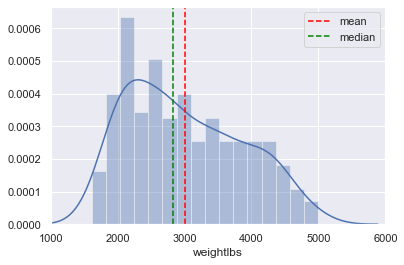

In [ ]:
# Let us look at it graphically - you may get a warning which will not affect results
mean = np.nanmean(cars["weightlbs"])
median = np.nanmedian(cars["weightlbs"])
n_bins = np.sqrt(len(cars.weightlbs))
sns.distplot(cars["weightlbs"], bins= int(n_bins))
plt.xlim((1000, 6000))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()

**MinMax and Z-score standardization are one of the scaling techniques. They doesn't affect the skewness**

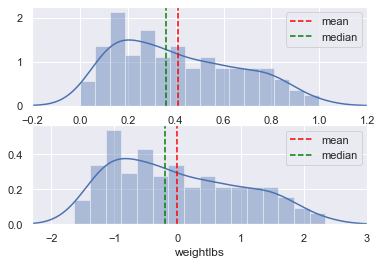

In [ ]:

#we will standardize variables and check skewness
#many falsely believe that applying MinMax or Z-score standardization
#will change the distribution to a normal distribution - this is not true as you will see
mean = np.nanmean(cars_minmax["weightlbs"])
median = np.nanmedian(cars_minmax["weightlbs"])
plt.subplot(2,1,1)
n_bins = np.sqrt(len(cars_minmax.weightlbs))
sns.distplot(cars_minmax["weightlbs"], bins= int(n_bins))
plt.xlim((-0.2, 1.2))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()


mean = np.nanmean(cars_zscore["weightlbs"])
median = np.nanmedian(cars_zscore["weightlbs"])
plt.subplot(2,1,2)
n_bins = np.sqrt(len(cars_zscore.weightlbs))
sns.distplot(cars_zscore["weightlbs"], bins= int(n_bins))
plt.xlim((-2.3, +3))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()



## There are 3 ways to reduce skewness

1. Log transformation
2. Square root transformation
3. Inverted square root transformation

### 1. Log transformation

We can see that skewness has reduced

In [ ]:
cars_log = cars.weightlbs.apply(np.log)
mean = np.nanmean(cars_log)
median = np.nanmedian(cars_log)
std = np.nanstd(cars_log)
skewness = (3*(mean-median)) / std
print(skewness)


0.19595894456285476


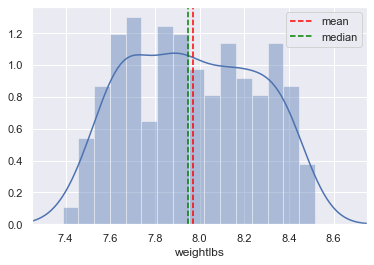

In [ ]:
# Let us look at it graphically
mean = np.nanmean(cars_log)
median = np.nanmedian(cars_log)

n_bins = np.sqrt(len(cars_log))
sns.distplot(cars_log, bins= int(n_bins))
plt.xlim((7.25, 8.75))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()

### 2. Square root transformation

In [ ]:
cars_sqrt = cars.weightlbs.apply(np.sqrt)
mean = np.nanmean(cars_sqrt)
median = np.nanmedian(cars_sqrt)
std = np.nanstd(cars_sqrt)
skewness = (3*(mean-median)) / std
print(skewness)


0.40359860791178837


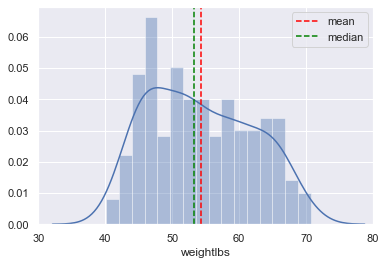

In [ ]:
# Let us look at it graphically
mean = np.nanmean(cars_sqrt)
median = np.nanmedian(cars_sqrt)

n_bins = np.sqrt(len(cars_sqrt))
sns.distplot(cars_sqrt, bins= int(n_bins))
plt.xlim((30, 80))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()

### 3. Inverted Square root

In [ ]:
cars_invsqrt = cars.weightlbs.apply(lambda x: np.reciprocal(np.sqrt(x)))
mean = np.nanmean(cars_invsqrt)
median = np.nanmedian(cars_invsqrt)
std = np.nanstd(cars_invsqrt)
skewness = (3*(mean-median)) / std
print(skewness)


0.015463227861404498


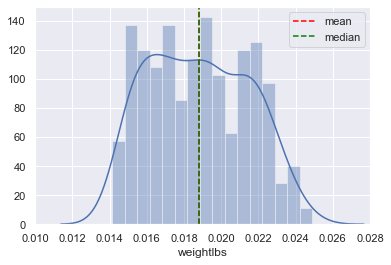

In [ ]:
# Let us look at it graphically
mean = np.nanmean(cars_invsqrt)
median = np.nanmedian(cars_invsqrt)

n_bins = np.sqrt(len(cars_invsqrt))
sns.distplot(cars_invsqrt, bins= int(n_bins))
plt.xlim((0.010, 0.028))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()

###### 1 For Weightlbs we were able to reduce skewness using inverted root square transformation. This is not always the case, we shall apply each of these transformations to see which one reduces skewnes.

###### 2 Reducing skewness achieves symmetry but as probability plot below shows, it doesn't lead to normalization.

*<u> Side Note </u>*
1. In some languages (ex. in R) Following plots are also called Q-Q plot or Quantile Quantile plot - It is essentially a plot between quantile distribution of given data and quantile distribution of normal distributed theoretical dataset
2. In some languages, theoretical quantiles are on Y-axis (ex. in R), so if you refer other sources, always look at what is shown on X-axis and Y-axis. The information from these graphs essentially remains same.

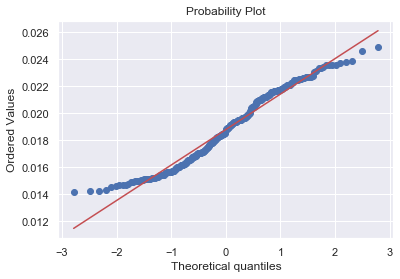

In [ ]:
stats.probplot(cars_invsqrt, dist="norm", plot = plt);